In [1]:
# LSTM 모델링

from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_words = 10000
maxlen_for_padding = 500

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_words)

train_x = sequence.pad_sequences(train_x, maxlen=maxlen_for_padding)
test_x = sequence.pad_sequences(test_x, maxlen=maxlen_for_padding)

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics=["acc"])

history = model.fit(train_x, train_y, batch_size = 128, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 41s 260ms/step - loss: 0.5266 - acc: 0.7509 - val_loss: 0.3941 - val_acc: 0.8334
Epoch 2/10
157/157 [==============================] - 40s 256ms/step - loss: 0.3083 - acc: 0.8765 - val_loss: 0.3775 - val_acc: 0.8512
Epoch 3/10
157/157 [==============================] - 38s 244ms/step - loss: 0.2412 - acc: 0.9083 - val_loss: 0.3463 - val_acc: 0.8612
Epoch 4/10
157/157 [==============================] - 42s 268ms/step - loss: 0.2050 - acc: 0.9247 - val_loss: 0.3306 - val_acc: 0.8770
Epoch 5/10
157/157 [==============================] - 39s 249ms/step - loss: 0.1776 - acc: 0.9357 - val_loss: 0.3318 - val_acc: 0.8892
Epoch 6/10
157/157 [==============================] - 39s 246ms/step - loss: 0.1572 - acc: 0.9437 - val_loss: 0.3215 - val_acc: 0.8898
Epoch 7/10
157/157 [==============================] - 41s 259ms/step - loss: 0.1412 - acc: 0.9492 - val_loss: 0.3775 - val_acc: 0.8462
Epoch 8/10
157/157 [==============================] - 4

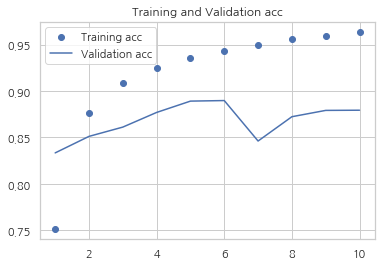

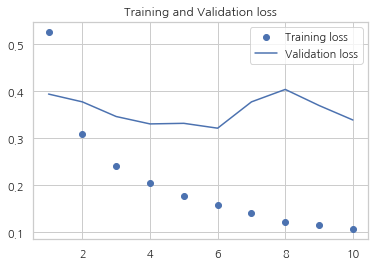

In [3]:
%matplotlib inline

acc = history.history["acc"]
loss = history.history["loss"]
val_acc = history.history["val_acc"]
val_loss = history.history["val_loss"]

epochs = list(range(1, len(acc) + 1))

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.legend()
plt.title("Training and Validation acc")

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.legend()
plt.title("Training and Validation loss")

plt.show()